In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [6]:
# loading and reading dataset
data = pd.read_csv("D:\Hitesh Files\SM.csv")
print(data.head())

  Order ID Customer Name      Category       Sub Category          City  \
0     OD33         Akash  Oil & Masala  Edible Oil & Ghee        Trichy   
1   OD5318         Akash  Oil & Masala            Masalas          Ooty   
2   OD1609         Akash        Bakery           Biscuits    Coimbatore   
3   OD2499         Akash        Snacks            Noodles       Chennai   
4   OD8967         Akash  Oil & Masala             Spices  Virudhunagar   

   Order Date Region  Sales  Discount  Profit       State  Invoice  
0  17-09-2016   East   2163      0.26  670.53  Tamil Nadu    12033  
1  01-11-2016   East   1783      0.12  338.77  Tamil Nadu    12033  
2  04-12-2016   East   1907      0.35  247.91  Tamil Nadu    12033  
3  06-12-2016   East    874      0.12  384.56  Tamil Nadu    12033  
4  19-12-2016   East    772      0.24  270.20  Tamil Nadu    12033  


In [7]:
# shape of the data
data.shape

(2525, 12)

In [4]:
#data information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2525 entries, 0 to 2524
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       2525 non-null   object 
 1   Customer Name  2525 non-null   object 
 2   Category       2525 non-null   object 
 3   Sub Category   2525 non-null   object 
 4   City           2525 non-null   object 
 5   Order Date     2525 non-null   object 
 6   Region         2525 non-null   object 
 7   Sales          2525 non-null   int64  
 8   Discount       2525 non-null   float64
 9   Profit         2525 non-null   float64
 10  State          2525 non-null   object 
 11  Invoice        2525 non-null   int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 236.8+ KB


In [32]:
# describing the data
data.describe()

,Sales,Discount,Profit,Invoice
count,2525.00000,2525.000000,2525.000000,2.525000e+03
mean,1495.50495,0.226931,380.083992,1.117899e+06
std,584.39468,0.074656,244.005838,2.971507e+05
min,500.00000,0.100000,25.850000,1.203300e+04
25%,984.00000,0.160000,184.230000,1.202659e+06
50%,1492.00000,0.230000,321.030000,1.205095e+06
75%,2007.00000,0.290000,538.560000,1.207311e+06
max,2500.00000,0.350000,1103.400000,1.209991e+06


In [33]:
#column to list 
data.columns.tolist()

['Order ID',
 'Customer Name',
 'Category',
 'Sub Category',
 'City',
 'Order Date',
 'Region',
 'Sales',
 'Discount',
 'Profit',
 'State',
 'Invoice']

In [34]:
# check for missing values:
data.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
Invoice          0
dtype: int64

In [35]:
#checking duplicate values 
data.nunique()

Order ID         2525
Customer Name      13
Category            7
Sub Category       23
City               24
Order Date        940
Region              4
Sales            1402
Discount           26
Profit           2414
State               1
Invoice           539
dtype: int64

In [76]:
#clearing the unnecessary columns
SM = data.drop(['Order ID', 'State','Customer Name', 'Category', 'Sub Category', 'City', 'Region'], axis=1)
SM.head()

,Order Date,Sales,Discount,Profit,Invoice,Order_Date,quarter
0,2016-09-17,2163,0.26,670.53,12033,2016-09-17,3
1,2016-11-01,1783,0.12,338.77,12033,2016-11-01,4
2,2016-12-04,1907,0.35,247.91,12033,2016-12-04,4
3,2016-12-06,874,0.12,384.56,12033,2016-12-06,4
4,2016-12-19,772,0.24,270.20,12033,2016-12-19,4


In [63]:
#stastical summery
SM.describe().T

,count,mean,min,25%,50%,75%,max,std
Order Date,2525,2017-04-22 02:37:24.118811648,2015-01-06 00:00:00,2016-05-01 00:00:00,2017-06-12 00:00:00,2018-05-09 00:00:00,2018-12-30 00:00:00,NaN
Sales,2525.0,1495.50495,500.0,984.0,1492.0,2007.0,2500.0,584.39468
Discount,2525.0,0.226931,0.1,0.16,0.23,0.29,0.35,0.074656
Profit,2525.0,380.083992,25.85,184.23,321.03,538.56,1103.4,244.005838
Invoice,2525.0,1117899.426535,12033.0,1202659.0,1205095.0,1207311.0,1209991.0,297150.747361
Order_Date,2525,2017-04-22 02:37:24.118811648,2015-01-06 00:00:00,2016-05-01 00:00:00,2017-06-12 00:00:00,2018-05-09 00:00:00,2018-12-30 00:00:00,NaN
quarter,2525.0,2.861782,1.0,2.0,3.0,4.0,4.0,1.053024


In [64]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Region', 'State'],
      dtype='object')
Numerical Variables:
['Sales', 'Discount', 'Profit', 'Invoice', 'quarter']


# **EDA Process - 1) Heatmap**

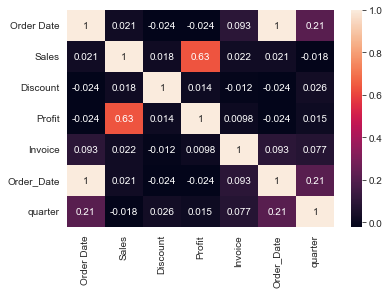

<Axes: >

In [77]:
#relationship analysis
corelation = SM.corr()
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

# **2) Displaying all the data using Skew**

Sales
Skew : 0.0


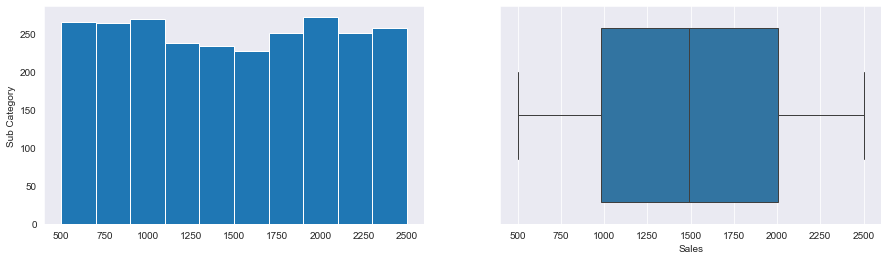

Discount
Skew : -0.03


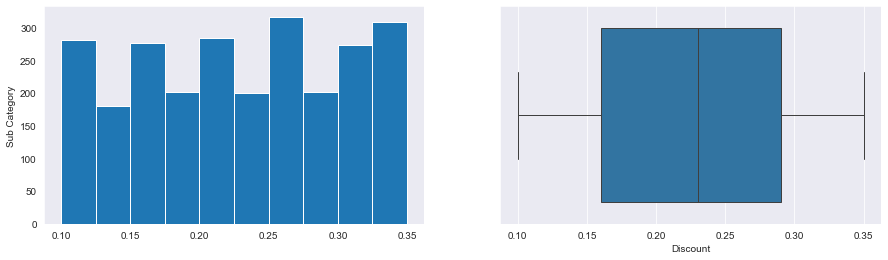

Profit
Skew : 0.77


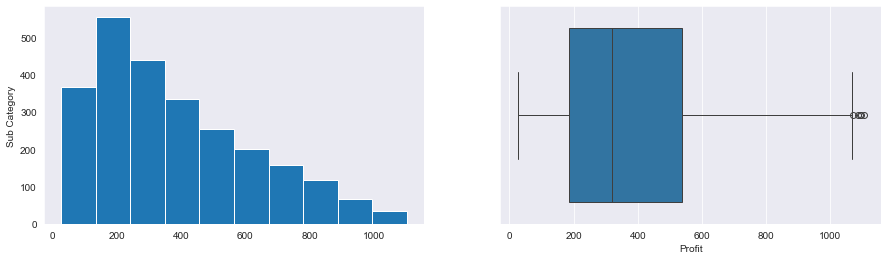

Invoice
Skew : -3.1


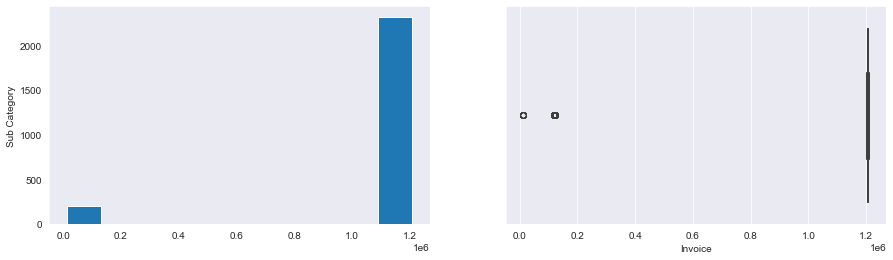

quarter
Skew : -0.42


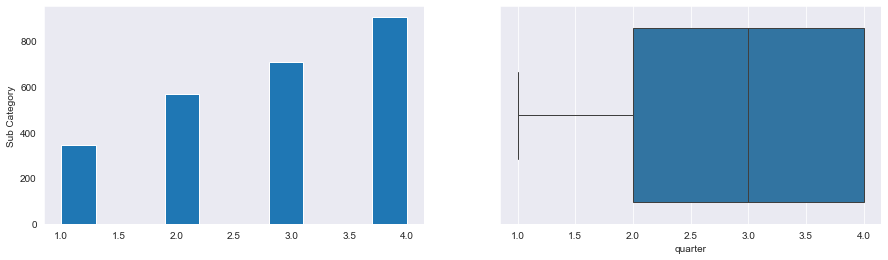

In [66]:
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('Sub Category')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

# **3)** **Bar plot for all categorical variables in the dataset**

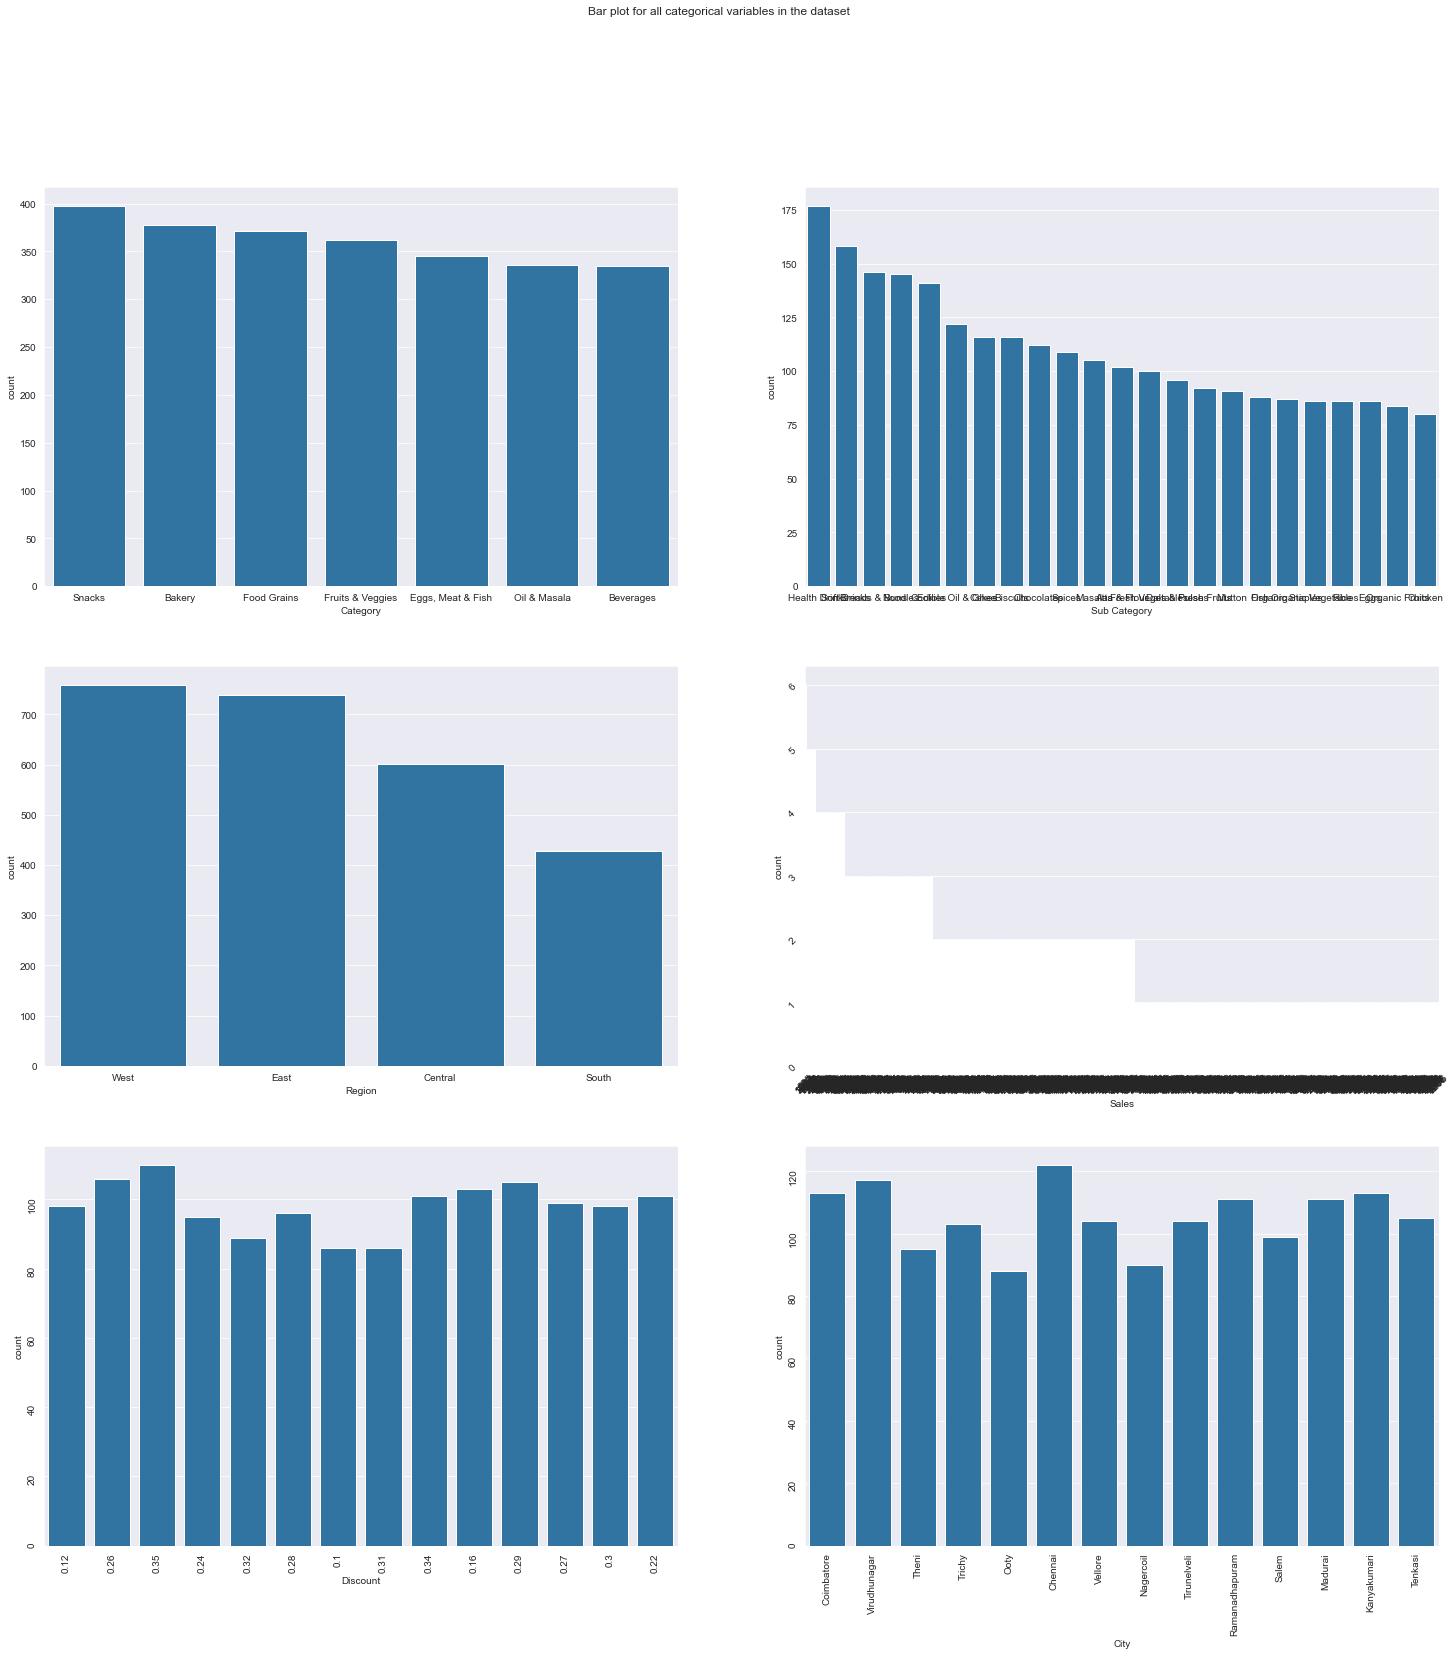

In [78]:
fig, axes = plt.subplots(3, 2, figsize = (25, 25))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'Category', data = data,  
              order = data['Category'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'Sub Category', data = data,  
              order = data['Sub Category'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'Region', data = data,  
              order = data['Region'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'Sales', data = data,  
              order = data['Sales'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'Discount', data = data,  
              order = data['Discount'].head(20).value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'City', data = data,  
              order = data['City'].head(20).value_counts().index);
axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=90);
axes[2][1].tick_params(labelrotation=90);

# **4) Numeric Data**

<Figure size 1440x1440 with 0 Axes>

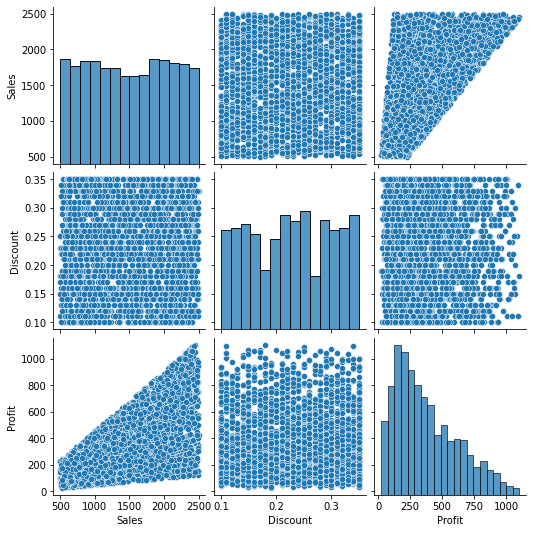

In [43]:
plt.figure(figsize=(20, 20))
sns.pairplot(data=data.drop(['Category','Sub Category', 'Invoice'],axis=1))
plt.show()

<ipython-input-8-f0d1a083d628>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Sales'])


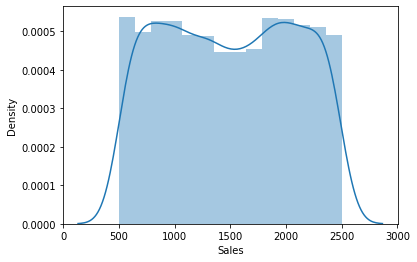

<Axes: xlabel='Sales', ylabel='Density'>

In [8]:
sns.distplot(data['Sales'])

<ipython-input-9-5c9dc59bcdb4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Profit'])


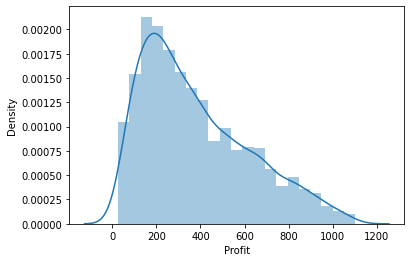

<Axes: xlabel='Profit', ylabel='Density'>

In [9]:
sns.distplot(data['Profit'])

<ipython-input-10-6ab7cf39ac50>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Discount'])


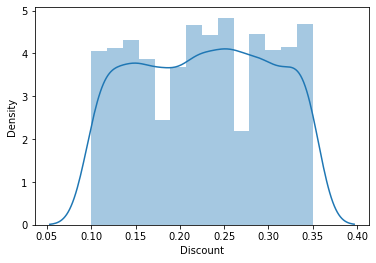

<Axes: xlabel='Discount', ylabel='Density'>

In [10]:
sns.distplot(data['Discount'])

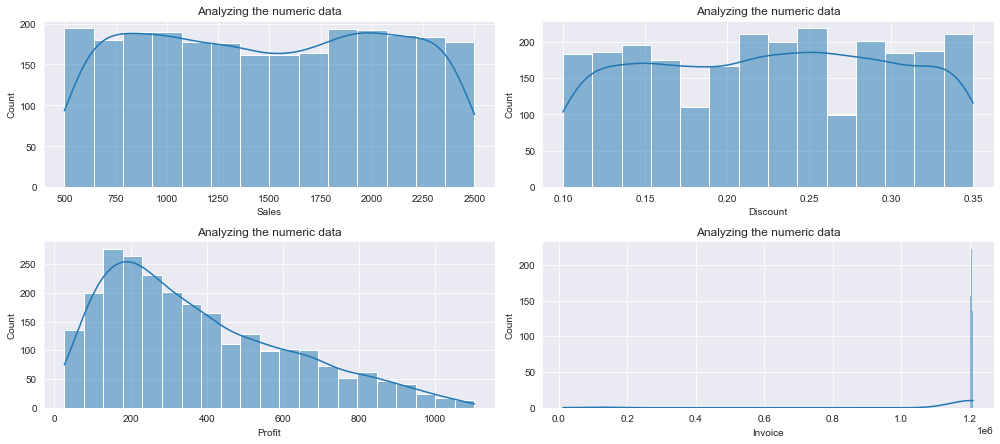

In [68]:
sns.set_style("darkgrid")
# Identify numerical columns
numerical_columns = data.select_dtypes(include=["int64", "float64"]).columns
# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
	plt.subplot(len(numerical_columns), 2, idx)
	sns.histplot(data[feature], kde=True)
	plt.title("Analyzing the numeric data")
# Adjust layout and show plots
plt.tight_layout()
plt.show()
